In [2]:
import os
print(os.getcwd())

C:\Users\dsp\Documents\MLdata\fin_insight


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import yfinance as yf
from datetime import datetime ,date,timedelta
import finnhub
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import random as sparse_random

In [4]:
# get your api key from https://finnhub.io
finnhub_client =finnhub.Client(api_key="c4iraqqad3ic5n24v860")

In [5]:
#generate sp500 stock symbol
sp500 = pd.read_csv("./csv/sp500.csv")
symbol = list(sp500.Symbol)
symbol.remove('BF.B')
symbol.remove('BRK.B')

In [6]:
#60 calls/minute
#Limitation can be found from: 
#https://finnhub.io/docs/api/rate-limit
# for name in symbol[:60]: 
#     print(name)
#     lst = finnhub_client.company_news(name, _from="2020-12-17", to="2021-08-17")
#     df = pd.DataFrame.from_dict(lst)
#     df.to_csv (name+'.csv', index = False, header=True)

#generate one year stock adj closing value from yahoo finance
end = datetime.now()
end = datetime(end.year, end.month, end.day)

# one year data for 500 companies
start = datetime(end.year - 1, end.month, end.day)
sp500symbol = list(sp500.Symbol)
closing_df = yf.download(sp500symbol, start = start, end=end)['Adj Close']


closing_df.head()

In [7]:
#generate one year stock adj closing value from yahoo finance
#end = datetime.now()
#end = datetime(end.year, end.month, end.day)

# one year data for 500 companies
#start = datetime(end.year - 1, end.month, end.day)
start ="2020-09-01"
end = "2021-09-01"
sp500symbol = list(sp500.Symbol)
sp500symbol.remove('BF.B')
sp500symbol.remove('BRK.B')
closing_df = yf.download(sp500symbol, start = start, end=end)['Adj Close']

[*********************100%***********************]  501 of 501 completed


In [8]:
returns = closing_df.pct_change()

In [9]:
type(returns)

pandas.core.frame.DataFrame

In [10]:
returns.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-02,0.022745,0.009924,0.010934,-0.020718,0.018539,0.042312,0.017571,0.027123,0.029831,0.011081,...,0.043764,0.033710,-0.006087,0.019621,0.017741,0.019033,0.017725,0.025073,0.006213,0.020241
2020-09-03,-0.036550,0.009826,-0.018469,-0.080061,-0.022139,-0.007224,-0.059860,-0.035727,-0.033174,-0.048707,...,-0.012579,-0.052912,-0.002041,-0.025585,-0.018274,-0.016840,-0.017136,-0.085304,0.003087,-0.039497
2020-09-04,-0.028101,0.018713,-0.009215,0.000662,0.000000,-0.010043,-0.061631,-0.012982,-0.012177,-0.031233,...,-0.008917,-0.014161,-0.000767,0.004488,0.002572,-0.011523,-0.005124,-0.032312,0.036626,-0.009824
2020-09-08,-0.017555,0.001470,-0.013138,-0.067295,-0.017960,-0.012836,-0.027910,-0.012673,-0.014487,-0.060597,...,-0.012996,-0.038863,-0.023030,-0.024352,-0.006352,-0.016173,-0.010873,-0.043331,-0.043349,-0.023722


In [11]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-09-01 to 2021-09-01
Columns: 501 entries, A to ZTS
dtypes: float64(501)
memory usage: 992.2 KB


In [12]:
returns.isnull().sum().sum()

677

In [13]:
index = returns.index
index

DatetimeIndex(['2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04',
               '2020-09-08', '2020-09-09', '2020-09-10', '2020-09-11',
               '2020-09-14', '2020-09-15',
               ...
               '2021-08-19', '2021-08-20', '2021-08-23', '2021-08-24',
               '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', name='Date', length=253, freq=None)

In [14]:
returns = returns.iloc[1:-2,:]

In [15]:
returns.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-02,0.022745,0.009924,0.010934,-0.020718,0.018539,0.042312,0.017571,0.027123,0.029831,0.011081,...,0.043764,0.033710,-0.006087,0.019621,0.017741,0.019033,0.017725,0.025073,0.006213,0.020241
2020-09-03,-0.036550,0.009826,-0.018469,-0.080061,-0.022139,-0.007224,-0.059860,-0.035727,-0.033174,-0.048707,...,-0.012579,-0.052912,-0.002041,-0.025585,-0.018274,-0.016840,-0.017136,-0.085304,0.003087,-0.039497
2020-09-04,-0.028101,0.018713,-0.009215,0.000662,0.000000,-0.010043,-0.061631,-0.012982,-0.012177,-0.031233,...,-0.008917,-0.014161,-0.000767,0.004488,0.002572,-0.011523,-0.005124,-0.032312,0.036626,-0.009824
2020-09-08,-0.017555,0.001470,-0.013138,-0.067295,-0.017960,-0.012836,-0.027910,-0.012673,-0.014487,-0.060597,...,-0.012996,-0.038863,-0.023030,-0.024352,-0.006352,-0.016173,-0.010873,-0.043331,-0.043349,-0.023722
2020-09-09,0.029325,-0.042553,0.017268,0.039887,0.015628,0.008809,0.036317,0.028880,0.026907,0.037500,...,0.021415,0.027638,-0.006024,0.012823,0.025323,-0.003096,0.013885,0.023469,-0.003104,0.035177


In [16]:
returns.shape

(250, 501)

In [17]:
returns.isnull().sum()
num_na = returns.isnull().sum()
num_na[num_na > 0]

OGN    176
dtype: int64

In [18]:
returns1 = returns.dropna(axis=1)

In [19]:
returns1.shape

(250, 500)

In [20]:
returns1.isnull().sum().sum()

0

In [21]:
#returns1 = returns.reset_index()

In [22]:
returns2 = returns1.T
returns2

Date,2020-09-02,2020-09-03,2020-09-04,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-14,2020-09-15,2020-09-16,...,2021-08-17,2021-08-18,2021-08-19,2021-08-20,2021-08-23,2021-08-24,2021-08-25,2021-08-26,2021-08-27,2021-08-30
A,0.022745,-0.036550,-0.028101,-0.017555,0.029325,0.006535,0.000304,0.008316,0.009555,-0.004483,...,-0.007157,0.013113,0.028524,0.002744,0.011122,0.003353,0.016005,0.001673,0.001267,0.016800
AAL,0.009924,0.009826,0.018713,0.001470,-0.042553,-0.003065,-0.004612,0.023938,-0.009050,0.050228,...,-0.021255,-0.010341,-0.021421,-0.012280,0.032973,0.037677,0.016137,-0.012407,0.016080,-0.035114
AAP,0.010934,-0.018469,-0.009215,-0.013138,0.017268,-0.005118,0.006707,0.017595,-0.002733,-0.014278,...,-0.021153,-0.000722,0.003612,0.006287,-0.009109,0.000048,0.021465,-0.016114,-0.023944,-0.013149
AAPL,-0.020718,-0.080061,0.000662,-0.067295,0.039887,-0.032646,-0.013129,0.030000,0.001560,-0.029514,...,-0.006154,-0.025501,0.002323,0.010157,0.010257,-0.000601,-0.008421,-0.005527,0.007185,0.030417
ABBV,0.018539,-0.022139,0.000000,-0.017960,0.015628,-0.021609,0.000558,0.008807,0.004641,-0.012430,...,0.010557,-0.019806,0.005457,0.007547,0.004545,0.002681,0.006016,0.000000,-0.006811,0.008279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,0.019033,-0.016840,-0.011523,-0.016173,-0.003096,-0.011136,-0.000866,0.006503,0.006999,0.013794,...,-0.001480,-0.003928,-0.003200,0.003732,0.003272,-0.010082,0.006740,-0.018964,0.002283,-0.007669
ZBH,0.017725,-0.017136,-0.005124,-0.010873,0.013885,-0.010913,0.003894,0.009913,0.026389,0.011296,...,0.008801,-0.023536,-0.001801,0.009298,-0.000825,0.023393,0.011093,-0.005320,0.003209,-0.001932
ZBRA,0.025073,-0.085304,-0.032312,-0.043331,0.023469,-0.022226,0.002085,0.005201,0.024676,-0.012856,...,-0.017822,-0.009775,0.009943,0.015585,0.012949,-0.000311,0.009331,-0.008902,0.015633,-0.005409
ZION,0.006213,0.003087,0.036626,-0.043349,-0.003104,-0.031133,0.011889,0.024770,-0.034397,0.020860,...,-0.012355,-0.013245,-0.008762,0.013165,0.018192,0.017320,0.016846,-0.017448,0.050224,-0.023057


In [23]:
returns2.index

Index(['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE',
       ...
       'XEL', 'XLNX', 'XOM', 'XRAY', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZION',
       'ZTS'],
      dtype='object', length=500)

In [24]:
returns2.columns

DatetimeIndex(['2020-09-02', '2020-09-03', '2020-09-04', '2020-09-08',
               '2020-09-09', '2020-09-10', '2020-09-11', '2020-09-14',
               '2020-09-15', '2020-09-16',
               ...
               '2021-08-17', '2021-08-18', '2021-08-19', '2021-08-20',
               '2021-08-23', '2021-08-24', '2021-08-25', '2021-08-26',
               '2021-08-27', '2021-08-30'],
              dtype='datetime64[ns]', name='Date', length=250, freq=None)

In [25]:
returns2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, A to ZTS
Columns: 250 entries, 2020-09-02 to 2021-08-30
dtypes: float64(250)
memory usage: 980.5+ KB


In [26]:
returns2.describe()

Date,2020-09-02,2020-09-03,2020-09-04,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-14,2020-09-15,2020-09-16,...,2021-08-17,2021-08-18,2021-08-19,2021-08-20,2021-08-23,2021-08-24,2021-08-25,2021-08-26,2021-08-27,2021-08-30
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.018412,-0.024103,-0.002639,-0.021496,0.013685,-0.014474,0.004259,0.018014,0.001906,0.006197,...,-0.008352,-0.010276,-0.002761,0.007257,0.007843,0.004994,0.005551,-0.007708,0.011234,-0.002215
std,0.015855,0.021989,0.018062,0.021800,0.016753,0.016593,0.014441,0.017733,0.018137,0.020709,...,0.015571,0.011688,0.017025,0.009633,0.015442,0.014602,0.011271,0.012415,0.012136,0.013103
min,-0.058268,-0.119709,-0.064150,-0.210628,-0.042553,-0.092212,-0.059635,-0.055882,-0.107563,-0.084386,...,-0.118323,-0.042246,-0.078827,-0.027334,-0.026202,-0.060986,-0.053067,-0.120767,-0.027707,-0.060353
25%,0.010102,-0.035737,-0.012434,-0.031552,0.003389,-0.022421,-0.004204,0.007994,-0.006790,-0.005665,...,-0.016450,-0.016015,-0.013120,0.001799,-0.002738,-0.004551,-0.000663,-0.013633,0.003268,-0.010820
50%,0.018295,-0.021856,-0.003287,-0.019178,0.014626,-0.014977,0.003948,0.015919,0.001846,0.004866,...,-0.007161,-0.010853,-0.001660,0.006393,0.005397,0.003541,0.004504,-0.006475,0.009751,-0.000033
75%,0.027179,-0.011120,0.006586,-0.010961,0.024083,-0.007578,0.012399,0.025655,0.011468,0.016585,...,0.001708,-0.005574,0.007265,0.011519,0.014671,0.011530,0.011564,-0.001237,0.017573,0.006366
max,0.116267,0.052065,0.082110,0.079333,0.109234,0.083676,0.069433,0.125832,0.071827,0.106557,...,0.045800,0.095852,0.104908,0.051419,0.075918,0.083185,0.086608,0.050969,0.069167,0.036432


In [27]:
returns2.isnull().sum()

Date
2020-09-02    0
2020-09-03    0
2020-09-04    0
2020-09-08    0
2020-09-09    0
             ..
2021-08-24    0
2021-08-25    0
2021-08-26    0
2021-08-27    0
2021-08-30    0
Length: 250, dtype: int64

In [28]:
returns.to_csv('returns2.csv')

In [30]:
X = returns2

In [56]:
r_com = range(5, X.shape[1])
ratio_sum = []
for n_com in r_com:
    svd = TruncatedSVD(n_components=n_com, n_iter=7, random_state=42)
    svd.fit_transform(X)
    ratio_sum.append(svd.explained_variance_ratio_.sum())

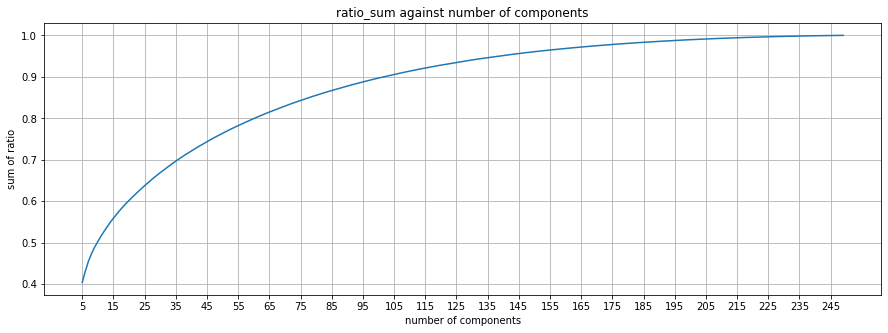

In [63]:
plt.figure(figsize=(15,5))
plt.plot(r_com, ratio_sum)
plt.title('ratio_sum against number of components')
plt.xlabel('number of components')
plt.ylabel('sum of ratio')
plt.xticks(range(5, X.shape[1],10))
plt.grid()
plt.show()

In [69]:
from termcolor import colored

In [74]:
svd = TruncatedSVD(n_components=95, n_iter=7, random_state=42)
t = svd.fit_transform(X)
print(colored('sum of ratio:','blue'),round(svd.explained_variance_ratio_.sum(),2))

print(colored('ratio\n','red'),svd.explained_variance_ratio_)

print(colored('singular values\n','red'),svd.singular_values_)

sum of ratio: 0.89
ratio
 [0.14910506 0.11905313 0.05534595 0.04446549 0.03640725 0.02743762
 0.02387122 0.01840857 0.01565823 0.01329386 0.01260968 0.01176338
 0.01113898 0.01100498 0.00965935 0.0094181  0.00918614 0.00847356
 0.00821475 0.0076374  0.0075772  0.00721907 0.00704711 0.00691924
 0.00678002 0.00663034 0.00641891 0.00639248 0.00601479 0.00597074
 0.00580122 0.00567011 0.00554936 0.00550753 0.00535106 0.0050941
 0.00505295 0.00489802 0.00482596 0.00467585 0.00463303 0.00457131
 0.00447148 0.00445062 0.00426877 0.00418515 0.00415791 0.00407803
 0.00395639 0.00387355 0.00378927 0.00375267 0.00369949 0.00365373
 0.00356332 0.00348074 0.00344232 0.00341221 0.00331607 0.0032756
 0.00325785 0.00320982 0.00317737 0.00304824 0.0030155  0.00294918
 0.00294142 0.0029084  0.00286209 0.00281986 0.00279392 0.00273486
 0.00270338 0.00263642 0.00259924 0.00257946 0.00251926 0.00248436
 0.00244847 0.00242083 0.00237755 0.00236361 0.00230749 0.0022464
 0.00221555 0.00220857 0.00216148 0.002

In [75]:
svd.components_

array([[ 0.07337504, -0.07492298,  0.01819953, ..., -0.04663025,
         0.07193675, -0.03592144],
       [ 0.08852618, -0.23830809, -0.09770985, ...,  0.00141183,
         0.01851085,  0.05352579],
       [-0.13168887,  0.046477  ,  0.01115407, ...,  0.01537622,
         0.0451673 , -0.0236858 ],
       ...,
       [-0.11806277,  0.04831125,  0.0874773 , ...,  0.03639934,
         0.03733453,  0.02943262],
       [-0.09362256,  0.0378954 ,  0.01061608, ...,  0.03293987,
        -0.09806584, -0.0759172 ],
       [-0.12623338,  0.08152006,  0.07928387, ...,  0.07344078,
        -0.02925598,  0.01726458]])

In [76]:
comp95 = pd.DataFrame(svd.components_, columns= returns2.columns)
comp95

Date,2020-09-02,2020-09-03,2020-09-04,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-14,2020-09-15,2020-09-16,...,2021-08-17,2021-08-18,2021-08-19,2021-08-20,2021-08-23,2021-08-24,2021-08-25,2021-08-26,2021-08-27,2021-08-30
0,0.073375,-0.074923,0.018200,-0.105167,0.034762,-0.070078,0.022556,0.095424,-0.006763,0.062041,...,-0.058596,-0.042128,-0.042991,0.032399,0.062873,0.050131,0.037992,-0.046630,0.071937,-0.035921
1,0.088526,-0.238308,-0.097710,-0.100698,0.137050,-0.043145,-0.003058,0.063025,0.073894,-0.074011,...,-0.025899,-0.036278,0.059967,0.037928,0.011956,-0.017406,0.007428,0.001412,0.018511,0.053526
2,-0.131689,0.046477,0.011154,-0.009836,-0.063809,0.034401,-0.052969,-0.027113,0.019909,0.007300,...,-0.032675,0.054306,-0.051157,-0.017431,0.126577,0.074159,0.012193,0.015376,0.045167,-0.023686
3,0.073716,0.052682,0.005131,0.071462,-0.061916,0.056383,-0.104374,0.069205,0.029357,-0.066160,...,0.049600,0.034498,0.063957,-0.004481,-0.032917,-0.013808,-0.010822,0.014594,-0.038756,0.008299
4,-0.004246,-0.026736,-0.108818,-0.171083,0.061878,-0.180893,-0.035223,-0.045349,0.035398,0.022055,...,0.115715,-0.087015,0.033458,-0.024278,0.022663,-0.050722,-0.043684,0.006141,0.021116,0.042733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,-0.066227,-0.106966,-0.008367,0.022900,0.017196,0.100648,0.077704,-0.002024,0.049998,-0.070525,...,0.002787,-0.026580,0.048628,0.033260,-0.049005,0.003603,-0.000162,0.007556,-0.044187,-0.001269
91,0.089225,-0.007943,-0.045361,0.076100,0.098229,-0.034817,-0.055426,-0.041742,0.042521,-0.033261,...,0.107650,0.050468,0.083794,0.041733,-0.045446,0.025485,-0.060097,-0.168038,0.015311,0.053715
92,-0.118063,0.048311,0.087477,-0.028191,0.045439,-0.033199,-0.001158,-0.071310,0.022060,-0.088178,...,0.079444,-0.101563,-0.152610,0.051617,0.069164,-0.021134,0.042199,0.036399,0.037335,0.029433
93,-0.093623,0.037895,0.010616,-0.000861,0.046022,0.118948,0.023598,-0.008824,-0.095641,-0.014584,...,-0.009206,0.019954,-0.106383,-0.027906,0.025445,-0.121474,-0.026053,0.032940,-0.098066,-0.075917


In [91]:
row_sum = comp5.shape[0]*comp5.mean()
rank = row_sum.rank(ascending=False)
rank[rank <=10]

Date
2020-11-02    10.0
2020-11-04     2.0
2020-11-20     8.0
2020-12-14     1.0
2021-02-09     9.0
2021-03-05     3.0
2021-03-22     7.0
2021-04-29     4.0
2021-05-07     6.0
2021-06-07     5.0
dtype: float64

In [77]:
row_sum  = comp95.apply( lambda x: x. sum (), axis =0)
type(row_sum)

pandas.core.series.Series

In [78]:
rank = row_sum.rank(ascending=False)

In [100]:
rank[rank <=10].index.date

array([datetime.date(2020, 11, 2), datetime.date(2020, 11, 4),
       datetime.date(2020, 11, 20), datetime.date(2020, 12, 14),
       datetime.date(2021, 2, 9), datetime.date(2021, 3, 5),
       datetime.date(2021, 3, 22), datetime.date(2021, 4, 29),
       datetime.date(2021, 5, 7), datetime.date(2021, 6, 7)], dtype=object)

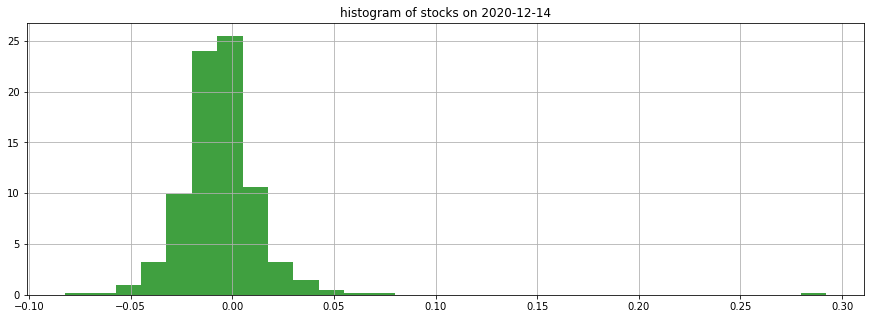

In [86]:
#Distribution of stocks on 2020-12-14
x = returns2['2020-12-14']
plt.figure(figsize=(15,5))
n, bins, patches = plt.hist(x, 30, density=True, facecolor='g', alpha=0.75)
plt.title('histogram of stocks on 2020-12-14')
plt.grid()
plt.show()

In [101]:
# clustering
big_change = returns2[list(rank[rank <=10].index.date)]
big_change.head()

Date,2020-11-02,2020-11-04,2020-11-20,2020-12-14,2021-02-09,2021-03-05,2021-03-22,2021-04-29,2021-05-07,2021-06-07
A,0.030855,0.013641,0.020335,-0.014686,-0.001378,0.010001,0.007499,-0.004822,0.011329,-0.001813
AAL,-0.007979,-0.021333,-0.020328,-0.020528,-0.018571,-0.037194,-0.045655,-0.018433,0.023732,-0.002058
AAP,0.027838,-0.012069,-0.011980,-0.000634,0.014075,0.036064,-0.016183,0.015433,0.001518,0.001297
AAPL,-0.000827,0.040837,-0.010958,-0.005147,-0.006574,0.010738,0.028336,-0.000749,0.005327,0.000079
ABBV,0.037015,0.074352,0.011739,-0.020124,-0.013478,0.009938,0.023980,-0.009292,-0.002843,0.005785


In [115]:
big_change.index

Index(['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE',
       ...
       'XEL', 'XLNX', 'XOM', 'XRAY', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZION',
       'ZTS'],
      dtype='object', length=500)

In [103]:
from sklearn.cluster import KMeans

In [107]:
n_clusters_arr = range(2, 16)
inertia_arr = []
for n_clust in n_clusters_arr:
    clf = KMeans(n_clusters=n_clust, random_state=0)
    clf.fit(big_change)
    inertia_arr.append(clf.inertia_)

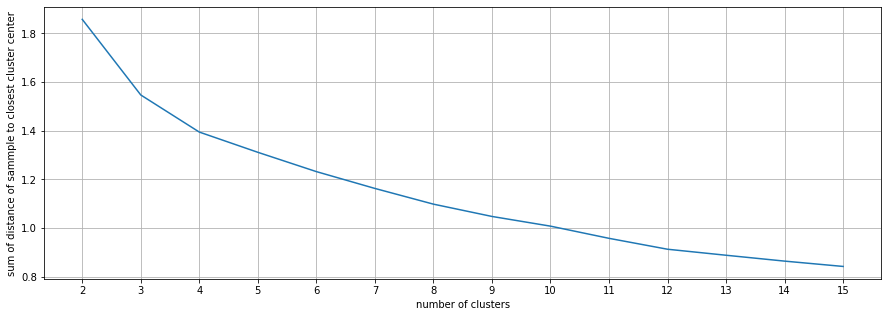

In [109]:
plt.figure(figsize=(15,5))
plt.plot(n_clusters_arr,inertia_arr)
plt.xlabel('number of clusters')
plt.ylabel('sum of distance of sammple to closest cluster center')
plt.xticks(range(2,16))
plt.grid()
plt.show()

In [120]:
clf = KMeans(n_clusters=4, random_state=0)
clf.fit(big_change)

KMeans(n_clusters=4, random_state=0)

In [121]:
label = clf.labels_

In [122]:
filtered_label0 = big_change[label == 0].index
filtered_label0

Index(['ADM', 'AIG', 'ALB', 'APA', 'ATO', 'BAC', 'BEN', 'BK', 'BKR', 'BXP',
       ...
       'VNO', 'VTR', 'WAB', 'WBA', 'WELL', 'WRB', 'WRK', 'XOM', 'XYL', 'ZION'],
      dtype='object', length=131)

In [123]:
filtered_label1 = big_change[label == 1].index
filtered_label1

Index(['A', 'AAL', 'AAP', 'ABC', 'ABT', 'ACN', 'ADP', 'ADSK', 'AEE', 'AEP',
       ...
       'WM', 'WMB', 'WMT', 'WU', 'WY', 'WYNN', 'XEL', 'XRAY', 'YUM', 'ZBH'],
      dtype='object', length=261)

In [124]:
filtered_label2 = big_change[label == 2].index
filtered_label2

Index(['AAPL', 'ABBV', 'ABMD', 'ADBE', 'ADI', 'AJG', 'AKAM', 'ALGN', 'ALXN',
       'AMAT',
       ...
       'UNH', 'V', 'VRSK', 'VRSN', 'VRTX', 'WLTW', 'WST', 'XLNX', 'ZBRA',
       'ZTS'],
      dtype='object', length=107)

In [125]:
filtered_label3 = big_change[label == 3].index
filtered_label3 

Index(['BIIB'], dtype='object')

In [127]:
print(os.getcwd())

C:\Users\dsp\Documents\MLdata\fin_insight


In [128]:
consti = pd.read_csv('constituents_csv.csv')

In [129]:
consti.head()

,Symbol,Name,Sector
0,MMM,3M,Industrials
1,AOS,A. O. Smith,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie,Health Care
4,ABMD,Abiomed,Health Care


In [135]:
consti.index = consti['Symbol']
consti.head()

,Symbol,Name,Sector
Symbol,,,
MMM,MMM,3M,Industrials
AOS,AOS,A. O. Smith,Industrials
ABT,ABT,Abbott Laboratories,Health Care
ABBV,ABBV,AbbVie,Health Care
ABMD,ABMD,Abiomed,Health Care


In [130]:
consti.shape

(505, 3)

In [149]:
returns2.columns = returns.index.date

In [150]:
df_merged = returns2.merge(consti, how='inner', left_index=True, right_index=True,sort=True)

In [151]:
df_merged.head()

,2020-09-02,2020-09-03,2020-09-04,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-14,2020-09-15,2020-09-16,...,2021-08-20,2021-08-23,2021-08-24,2021-08-25,2021-08-26,2021-08-27,2021-08-30,Symbol,Name,Sector
A,0.022745,-0.036550,-0.028101,-0.017555,0.029325,0.006535,0.000304,0.008316,0.009555,-0.004483,...,0.002744,0.011122,0.003353,0.016005,0.001673,0.001267,0.016800,A,Agilent Technologies,Health Care
AAL,0.009924,0.009826,0.018713,0.001470,-0.042553,-0.003065,-0.004612,0.023938,-0.009050,0.050228,...,-0.012280,0.032973,0.037677,0.016137,-0.012407,0.016080,-0.035114,AAL,American Airlines Group,Industrials
AAP,0.010934,-0.018469,-0.009215,-0.013138,0.017268,-0.005118,0.006707,0.017595,-0.002733,-0.014278,...,0.006287,-0.009109,0.000048,0.021465,-0.016114,-0.023944,-0.013149,AAP,Advance Auto Parts,Consumer Discretionary
AAPL,-0.020718,-0.080061,0.000662,-0.067295,0.039887,-0.032646,-0.013129,0.030000,0.001560,-0.029514,...,0.010157,0.010257,-0.000601,-0.008421,-0.005527,0.007185,0.030417,AAPL,Apple,Information Technology
ABBV,0.018539,-0.022139,0.000000,-0.017960,0.015628,-0.021609,0.000558,0.008807,0.004641,-0.012430,...,0.007547,0.004545,0.002681,0.006016,0.000000,-0.006811,0.008279,ABBV,AbbVie,Health Care


In [143]:
returns.index

DatetimeIndex(['2020-09-02', '2020-09-03', '2020-09-04', '2020-09-08',
               '2020-09-09', '2020-09-10', '2020-09-11', '2020-09-14',
               '2020-09-15', '2020-09-16',
               ...
               '2021-08-17', '2021-08-18', '2021-08-19', '2021-08-20',
               '2021-08-23', '2021-08-24', '2021-08-25', '2021-08-26',
               '2021-08-27', '2021-08-30'],
              dtype='datetime64[ns]', name='Date', length=250, freq=None)

In [145]:
df_merged.columns =returns.index.date

ValueError: Length mismatch: Expected axis has 253 elements, new values have 250 elements

## to do 
-elbow n_component
-distribution of stocks on 2021-08-02
-90%
-clustering
- investigate BIIB, why only this stock in a single cluster?
-某一领域: high tech , bank, airlines, .. (download online), corr within sectors and between sectors, variance per day. 
-大盘 average change 

most impactful events 


In [73]:
svd.inverse_transform(t)

array([[-0.03712116, -0.01129555, -0.02124685, ...,  0.00186185,
         0.004067  , -0.00351742],
       [ 0.01287127,  0.01986891, -0.02032962, ...,  0.0286958 ,
         0.01314883, -0.01315288],
       [-0.02266716, -0.00158716, -0.01858814, ..., -0.00011718,
         0.00445788, -0.00796058],
       ...,
       [-0.04730012, -0.01268331, -0.03140177, ...,  0.00738258,
         0.00715641, -0.00584025],
       [ 0.00340791,  0.02065192, -0.02655544, ...,  0.02116158,
         0.01375166, -0.01871591],
       [-0.03599926, -0.01339077, -0.01555909, ..., -0.00344421,
         0.00157654, -0.00130204]])

In [82]:
inverse = pd.DataFrame(svd.inverse_transform(t), index = returns2.index, columns = returns2.columns)
inverse

Date,2020-09-03,2020-09-04,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-14,2020-09-15,2020-09-16,2020-09-17,...,2021-08-13,2021-08-16,2021-08-17,2021-08-18,2021-08-19,2021-08-20,2021-08-23,2021-08-24,2021-08-25,2021-08-26
A,-0.037121,-0.011296,-0.021247,0.020120,-0.010743,-0.000234,0.017599,0.009719,-0.005484,-0.007421,...,0.002311,0.002149,-0.007704,-0.007762,0.005243,0.007707,0.006591,0.001862,0.004067,-0.003517
AAL,0.012871,0.019869,-0.020330,-0.017781,-0.010152,-0.006650,0.026709,-0.006268,0.026065,-0.005833,...,-0.016595,-0.023490,-0.018111,-0.000219,-0.024554,0.003946,0.035525,0.028696,0.013149,-0.013153
AAP,-0.022667,-0.001587,-0.018588,0.016746,-0.015784,0.012098,0.013500,-0.001874,0.007944,-0.000599,...,0.001566,0.005738,-0.007463,-0.012850,-0.001994,0.006997,-0.001498,-0.000117,0.004458,-0.007961
AAPL,-0.054067,-0.019166,-0.026206,0.029568,-0.012217,-0.002727,0.023050,0.016131,-0.013498,-0.012129,...,0.006131,0.005936,-0.007672,-0.009660,0.012284,0.010295,0.005118,-0.000956,0.003838,-0.002566
ABBV,-0.018480,-0.003404,-0.013487,0.010792,-0.008601,0.003126,0.010883,0.002489,0.001551,-0.002868,...,0.000367,0.001163,-0.005645,-0.006276,-0.000016,0.004767,0.003613,0.001985,0.003260,-0.004042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,-0.018587,-0.002190,-0.013787,0.011272,-0.010121,0.003559,0.014777,0.001471,0.002695,-0.005013,...,0.002091,0.003658,-0.005084,-0.008074,0.000909,0.005698,0.000729,0.000994,0.003631,-0.005479
ZBH,-0.012544,0.001731,-0.012867,0.003315,-0.007724,-0.005602,0.024342,0.002779,0.002919,-0.012494,...,0.001387,-0.000087,-0.005349,-0.005115,0.000443,0.005993,0.006380,0.006103,0.005436,-0.006654
ZBRA,-0.047300,-0.012683,-0.031402,0.024112,-0.015245,-0.000530,0.024040,0.012156,-0.003376,-0.008382,...,-0.000845,-0.002340,-0.013592,-0.009490,0.002102,0.010187,0.015899,0.007383,0.007156,-0.005840
ZION,0.003408,0.020652,-0.026555,-0.005331,-0.021403,0.008230,0.030978,-0.012565,0.033149,-0.003596,...,-0.011251,-0.011529,-0.018450,-0.011911,-0.023567,0.007857,0.021261,0.021162,0.013752,-0.018716


In [88]:
row_sum  = inverse.apply( lambda x: x. sum (), axis =0)
type(row_sum)

pandas.core.series.Series

In [91]:
rank = row_sum.rank(ascending=False)

In [92]:
rank[rank <=10]

Date
2020-11-02     4.0
2020-11-03     7.0
2020-11-05     8.0
2020-11-09     1.0
2020-11-13     6.0
2020-11-24    10.0
2021-01-06     2.0
2021-03-01     5.0
2021-03-05     3.0
2021-07-20     9.0
dtype: float64

In [9]:
# AAPL percentage_change
AAPL_pct_1y = returns[['AAPL']]
AAPL_pct_1y = AAPL_pct_1y.dropna(axis = 0)

In [10]:
AAPL_pct_1y.head()

,AAPL
Date,
2020-08-27,-0.011954
2020-08-28,-0.001620
2020-08-31,0.033912
2020-09-01,0.039833
2020-09-02,-0.020718


In [35]:
# len(AAPL_pct_1y['AAPL'].unique())
# # Sturge’s Rule
# 1 + 3.322 * np.log(3158)

(array([ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  2.,  8.,  6.,  8.,  7., 24.,
        26., 38., 31., 23., 24., 18., 10.,  8.,  6.,  6.,  0.,  1.,  1.,
         1.]),
 array([-0.08006092, -0.07474308, -0.06942525, -0.06410741, -0.05878958,
        -0.05347175, -0.04815391, -0.04283608, -0.03751824, -0.03220041,
        -0.02688257, -0.02156474, -0.0162469 , -0.01092907, -0.00561124,
        -0.0002934 ,  0.00502443,  0.01034227,  0.0156601 ,  0.02097794,
         0.02629577,  0.03161361,  0.03693144,  0.04224927,  0.04756711,
         0.05288494,  0.05820278,  0.06352061]),
 <BarContainer object of 27 artists>)

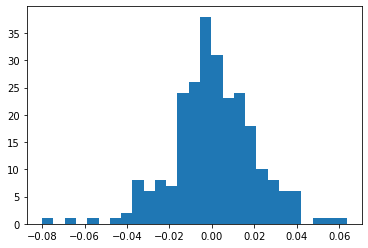

In [11]:
# plot the fequence of AAPL_pct
plt.hist(AAPL_pct_1y.AAPL, bins = 27)

In [15]:
std = np.std(AAPL_pct_1y['AAPL'])
n = AAPL_pct_1y['AAPL'].count()
mean = np.mean(AAPL_pct_1y['AAPL'])
up_tail =  mean + 1.96*(std/np.sqrt(n))
low_tail = mean - 1.96*(std/np.sqrt(n))

In [ ]:
np.std

In [12]:
def find_threshold(df):
    std = np.std(df['AAPL'])
    n = df['AAPL'].count()
    mean = np.mean(df['AAPL'])
    up_tail =  mean + 1.96*(std/np.sqrt(n))
    low_tail = mean - 1.96*(std/np.sqrt(n))
    return up_tail, low_tail

In [13]:
threshold_up, threshold_low = find_threshold(AAPL_pct_1y)
threshold_up, threshold_low

(0.00329559663776518, -0.0015880588819964692)

In [99]:
# use higher threshold to check the news
AAPL_post_1y = AAPL_pct_1y[AAPL_pct_1y.AAPL>0.04]
AAPL_neg_1y = AAPL_pct_1y[AAPL_pct_1y.AAPL<-0.04]

In [165]:
def scratch_news(df):
    df = df.reset_index()
    AAPL_news = pd.DataFrame()
    for i in df['Date']:
        prev_date = i - timedelta(days=1)
        AAPL= pd.DataFrame(finnhub_client.company_news('AAPL', _from=prev_date.date(), to=prev_date.date()))
        AAPL_news = pd.concat([AAPL_news, AAPL])
    
    AAPL_news['date'] = AAPL_news['datetime'].map(lambda x:datetime.fromtimestamp(x).date().isoformat())
    return AAPL_news

In [170]:
# news for stock pct_change > 0.04
AAPL_post_news = scratch_news(AAPL_post_1y)
AAPL_post_news.to_csv('AAPL_post_news_1y.csv', header = True, index = False)


# news for stock pct_change < -0.04
AAPL_neg_news = scratch_news(AAPL_neg_1y)
AAPL_neg_news.to_csv('AAPL_neg_news_1y.csv', header = True, index = False)

In [168]:
print("******positive news*********")
display(AAPL_post_news.head())

print("******Negative news*********")
display(AAPL_neg_news.head())

******positive news*********


,category,datetime,headline,id,image,related,source,summary,url,date
0,company,1602460800,K-Shaped Recovery: A “V” For Some But Not For ...,55171008,https://i-invdn-com.akamaized.net/redesign/ima...,AAPL,investing,Stocks Analysis by Lance Roberts covering: S&P...,https://finnhub.io/api/news?id=d1c936f2e4d1f39...,2020-10-11
1,company,1602460800,"iPhone 12 preview: New design, colors, and siz...",55167678,https://images.idgesg.net/images/article/2020/...,AAPL,https://www.macworld.com,Apple is set to unveil its latest iPhone on Tu...,https://finnhub.io/api/news?id=a5b6a5ffd2b7d8f...,2020-10-11
2,company,1602460800,Stocks Are Rising As Hopes For Stimulus Grow,55167183,https://i-invdn-com.akamaized.net/redesign/ima...,AAPL,investing,Stocks Analysis by Michael Kramer covering: Wa...,https://finnhub.io/api/news?id=9735e854a3451e6...,2020-10-11
3,company,1602460800,Wisconsin says Foxconn short of 2019 jobs pled...,55166944,https://i-invdn-com.akamaized.net/trkd-images/...,AAPL,investing,Wisconsin says Foxconn short of 2019 jobs pled...,https://finnhub.io/api/news?id=a540d876778501f...,2020-10-11
4,company,1602460800,PSA: Don't Buy Apple Products Today,55166805,https://thumbor.forbes.com/thumbor/fit-in/1200...,AAPL,https://www.forbes.com,"With Apple announcing new products tomorrow, i...",https://finnhub.io/api/news?id=ded0d09f63d661f...,2020-10-11


******Negative news*********


,category,datetime,headline,id,image,related,source,summary,url,date
0,company,1599091200,Apple Means Business With Striking New Privacy...,55092520,https://thumbor.forbes.com/thumbor/fit-in/1200...,AAPL,https://www.forbes.com,Apple has just made a striking new privacy mov...,https://finnhub.io/api/news?id=a6063dfdef0bc96...,2020-09-02
1,company,1599091200,Apps will have until early 2021 to implement i...,55092437,https://images.idgesg.net/images/article/2020/...,AAPL,https://www.macworld.com,The ad industry is really upset that it won’t ...,https://finnhub.io/api/news?id=91b7de69769aa39...,2020-09-02
2,company,1599087921,Why you should add a second screen to your iPhone,55091996,https://cdn.cultofmac.com/wp-content/uploads/2...,AAPL,https://www.cultofmac.com,Your iPhone can do even more if you hook it to...,https://finnhub.io/api/news?id=e545d2e2c7151d8...,2020-09-02
3,company news,1599085871,"Illusion, Perception And Reality: Stock Splits...",55090279,https://static.seekingalpha.com/uploads/2020/9...,AAPL,SeekingAlpha,"I have long argued that value and price, while...",https://finnhub.io/api/news?id=7ff1d1d2eb370eb...,2020-09-02
4,company news,1599077130,FTSE Vs. NDX: Huge Value/Growth Reversal Ahead,55090264,https://static.seekingalpha.com/uploads/2020/9...,AAPL,SeekingAlpha,The stampede into tech/growth at the expense o...,https://finnhub.io/api/news?id=101c54b05179699...,2020-09-02
